<h1 style="text-align:center"> CGS698C: Bayesian Data Analysis and Modelling </h1>
<h2 style="text-align:center"> End-semester exam </h2>

**Max marks: 100**<br>
**Time: 2 May 2022, 8am-11am (upload your notebook by 11.10am to hello.iitk.ac.in)**

<h2 style="text-align:center">  Instructions </h2>

1. Answer all 6 questions. You must also write the declaration at the beginning.
2. The exam is open book. But do not take help from or give help to any one else during the exam.
3. Add code/markdown cells as needed after each question to write your answers.
4. Upload your answer script as a Jupyter notebook file (.ipynb) on hello.iitk.ac.in. Your uploaded file should have your name and roll number as part of the filename.

<h2 style="text-align:center">  Declaration </h2>
<p style="text-align:center">(Certify in your own words that you have neither taken nor given any help during the exam except as permitted)</p>

Declaration: **I certify that I have neither taken not given any help during the exam except as permitted.**

The following description provides the context for all six questions that follow. The data is from various public sources so it can have inaccuracies and/or biases.

The data in the file **endsemData.csv** contains the number of terror incidents that happened between 2012 and 2015 in 100 countries. It also has various socio-political, economic, location and cultural attributes for those countries.

The 15 attributes are summarized below:

1. A unique numeric country code.
2. Country name.
3. A count of the number of terror incidents between 2012 and 2015.
4. GDP of the country.
5. Population of the country.
6. GDP per capita.
7. Religious diversity index.
8. Ethnic diversity index.
9. Linguistic diversity index.
10. Rule of law index.
11. Index for corruption.
12. Index for democracy.
13. Index for autocracy.
14. Region name (e.g. Asia, Europe etc.)
15. Region code (each region name above is associated with a numeric code).

Some indicies are inverted - that is a lower value of the index means a higher level of that attribute.

We want to build a model that will predict the number of terror incidents (dependent/ predicted variable) using the given attributes as potential predictor/ independent variables.

Each question below will require you to write/use Python code to do one or more of  visualize/ analyze/ build model/ simulate the model using the given data and then comment on justified implications/ conclusions based on the results you get.

**Credit will be based on the quality of your anwers.**


In [3]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy.stats import norm, t
import theano.tensor as tt

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/scalar/basic.py:2412: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.ctor = getattr(np, o_type.dtype)
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/pymc3/__init__.py:34: DeprecationWarning: Function 'semver.match' is deprecated. Deprecated since version 2.10.0.  This function will be removed in semver 3. Use the respective 'semver.VersionInfo.match' instead.
  if not semver.match(theano.__version__, ">=1.1.2"):
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version ins

## Question 1 [5]

Find the data attributes that are inverted - that is a higher value of the index means a lower level of the attribute. 
Use your knowledge of the countries of the world to decide. Briefly say which countries you compared to come to a decision.

In [4]:
data=pd.read_csv('endsemData.csv')

In [5]:
data.shape

(100, 15)

In [6]:
print(data.country[-50:])

50                  Italy
51                Jamaica
52                  Japan
53                 Jordan
54             Kazakhstan
55                  Kenya
56                 Kuwait
57                Lebanon
58                Lesotho
59                Liberia
60             Madagascar
61               Malaysia
62                   Mali
63                 Mexico
64                Moldova
65                Morocco
66             Mozambique
67                  Nepal
68            Netherlands
69            New Zealand
70              Nicaragua
71                  Niger
72                Nigeria
73               Pakistan
74               Paraguay
75                   Peru
76            Philippines
77                  Qatar
78                 Rwanda
79           Saudi Arabia
80                Senegal
81                Somalia
82           South Africa
83                  Spain
84              Sri Lanka
85                 Sweden
86            Switzerland
87             Tajikistan
88          

In [7]:
data[data.country=='Saudi Arabia']

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
79,100,Saudi Arabia,129,6.460020e+11,31540372,20481.749549,0.127,0.18,0.0949,0.273574,-0.004729,0,10,Middle East & North Africa,3


In [8]:
data[data.country=='Pakistan']

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
73,92,Pakistan,7247,2.710500e+11,188924874,1434.697265,0.3848,0.7098,0.7190,-0.870085,-0.934645,7,0,Asia,1


In [9]:
data[data.country=='United Kingdom']

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
96,124,United Kingdom,406,2.858003e+12,65138232,43875.968264,0.6944,0.1211,0.0532,1.684359,1.694164,10,0,Europe,2


In [10]:
data[data.country=='United States']

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
97,125,United States,100,1.803665e+13,321418820,56115.718426,0.8241,0.4901,0.2514,1.546544,1.293073,10,0,North America,4


In [11]:
data[data.country=='India']

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
45,53,India,3047,2.095398e+12,1311050527,1598.258768,0.326,0.4182,0.8069,-0.080621,-0.557113,9,0,Asia,1


In [12]:
data.head()

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
0,1,Afghanistan,6656,1.933100e+10,32526562,594.314272,0.2717,0.7693,0.6141,-1.672525,-1.432677,1,2,Asia,1
1,2,Albania,7,1.139800e+10,2889167,3945.081748,0.4719,0.2204,0.0399,-0.548157,-0.701515,9,0,Europe,2
2,3,Algeria,92,1.668390e+11,39666519,4206.040868,0.0091,0.3394,0.4427,-0.658459,-0.471443,3,1,Middle East & North Africa,3
3,4,Argentina,5,5.831690e+11,43416755,13431.888219,0.2236,0.2550,0.0618,-0.732617,-0.462757,9,0,South America,5
4,5,Armenia,3,1.052900e+10,3017712,3489.067214,0.4576,0.1272,0.1291,-0.316484,-0.461841,5,0,Asia,1


In [13]:
data.describe()

,cntryCode,count,gdp,population,gdpPerCapita,religion,ethnic,law,corruption,democracy,autocracy,regionCode
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,61.900000,437.570000,6.575940e+11,6.225877e+07,13636.505830,0.426754,0.454812,-0.085731,-0.065610,6.310000,1.440000,3.270000
std,37.708478,1516.942314,2.180759e+12,1.917441e+08,18384.389190,0.238277,0.254162,1.035320,1.052376,3.503807,2.555722,1.921989
min,1.000000,1.000000,1.057000e+09,7.748300e+05,277.039260,0.002800,0.011900,-2.435706,-1.589131,0.000000,0.000000,1.000000
25%,29.750000,3.000000,1.901075e+10,7.043274e+06,1374.955931,0.213150,0.209050,-0.818648,-0.817966,4.000000,0.000000,2.000000
50%,58.500000,14.500000,6.741800e+10,1.587356e+07,5087.863926,0.448050,0.478900,-0.363884,-0.410097,7.000000,0.000000,3.000000
75%,93.250000,110.250000,3.032050e+11,4.060408e+07,17378.331011,0.626975,0.665725,0.453197,0.404015,9.000000,1.000000,5.000000
max,130.000000,10955.000000,1.803665e+13,1.371220e+09,80945.087810,0.860300,0.930200,1.965622,2.425591,10.000000,10.000000,6.000000


corruption index seems inverted. i used knowledge of countries like United America, Pakistan, India, UNited Kingdom to come to this conclusion. 

## Question 2 [15]

Visualize the data to get a sense of which attributes are likely to be good predictors. Do this by plotting *suitable* (dependent, independent) variable pairs. What do you conclude from the visualization?

In [14]:
# fixing inverted corruption index
data.corruption=-data.corruption

In [15]:
data.head()

,cntryCode,country,count,gdp,population,gdpPerCapita,religion,ethnic,language,law,corruption,democracy,autocracy,region,regionCode
0,1,Afghanistan,6656,1.933100e+10,32526562,594.314272,0.2717,0.7693,0.6141,-1.672525,1.432677,1,2,Asia,1
1,2,Albania,7,1.139800e+10,2889167,3945.081748,0.4719,0.2204,0.0399,-0.548157,0.701515,9,0,Europe,2
2,3,Algeria,92,1.668390e+11,39666519,4206.040868,0.0091,0.3394,0.4427,-0.658459,0.471443,3,1,Middle East & North Africa,3
3,4,Argentina,5,5.831690e+11,43416755,13431.888219,0.2236,0.2550,0.0618,-0.732617,0.462757,9,0,South America,5
4,5,Armenia,3,1.052900e+10,3017712,3489.067214,0.4576,0.1272,0.1291,-0.316484,0.461841,5,0,Asia,1


- first I am excluding country, theri code variables since they are just country identification variables.  
- from pair-wise visual, it is clear that gdp, population, and gdpPerCapita do have some effect on the count variable. but as we know that all three are related variables. so we can consider gdpPerCapita as a potential predictor.
- corruption and low also seem to have some corr with count variable.
- these five only have abs corr higher than 0.1
    - population
    - gdpPerCapita
    - law
    - corruption
    - regionCode
- if I choose 0.2 to be my fagging corr value then corruption and low only seem to be potential indicators. 


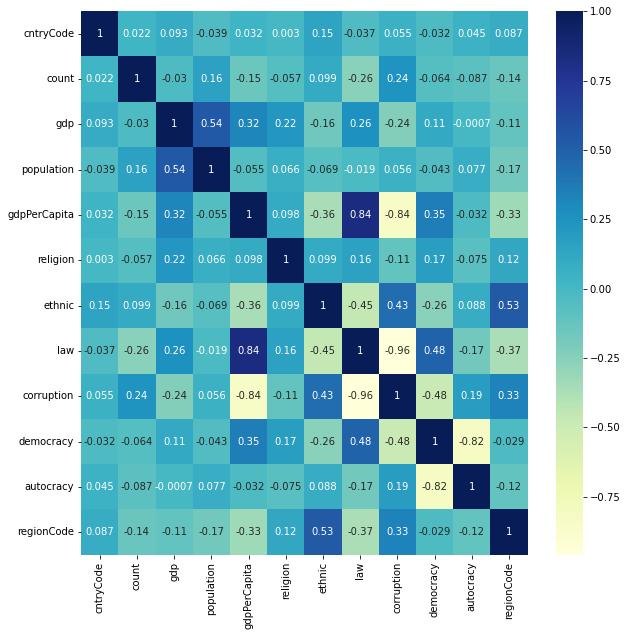

In [16]:
# print(data.corr())
  
# plotting correlation heatmap
fig=plt.figure(figsize=(10,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [17]:
potential_predictors=data.columns[3:-1]

In [18]:
potential_predictors

Index(['gdp', 'population', 'gdpPerCapita', 'religion', 'ethnic', 'language',
       'law', 'corruption', 'democracy', 'autocracy', 'region'],
      dtype='object')

In [19]:
data.regionCode.unique()

array([1, 2, 3, 5, 6, 4])

In [20]:
data.region.unique()

array(['Asia', 'Europe', 'Middle East & North Africa', 'South America',
       'Sub-Saharan Africa', 'North America'], dtype=object)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/seaborn/distributions.py:516: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = self.ax.fill_between([], [], color=color, **plot_kws)
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)
/hom

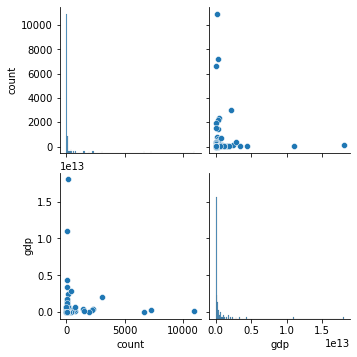

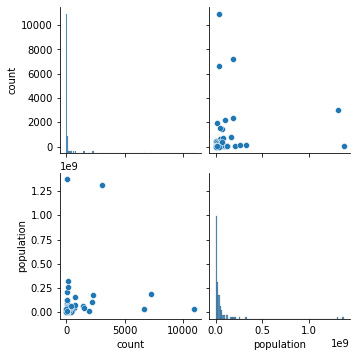

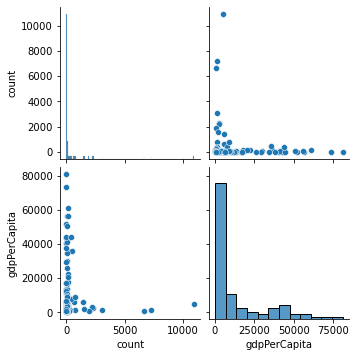

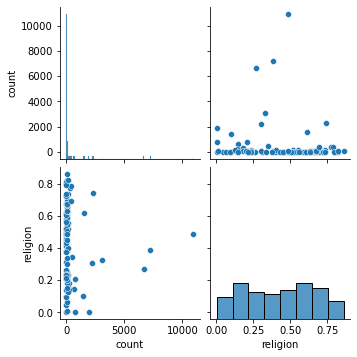

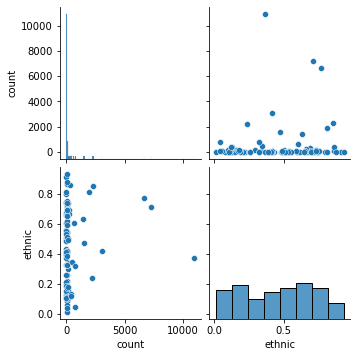

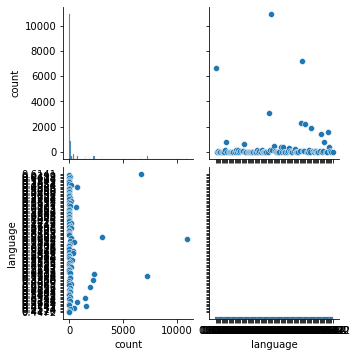

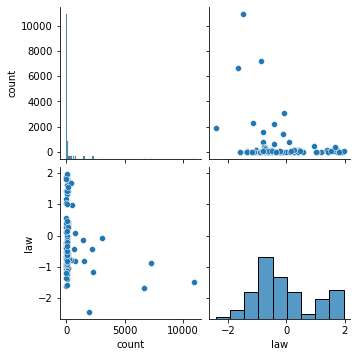

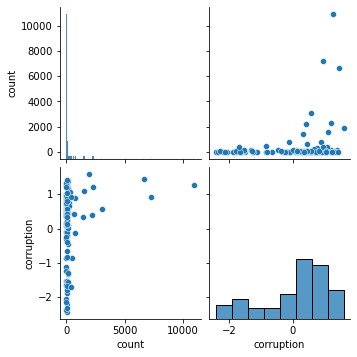

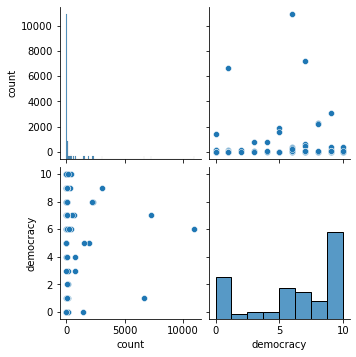

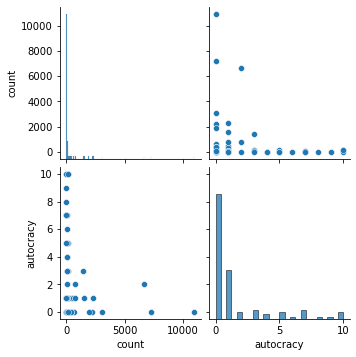

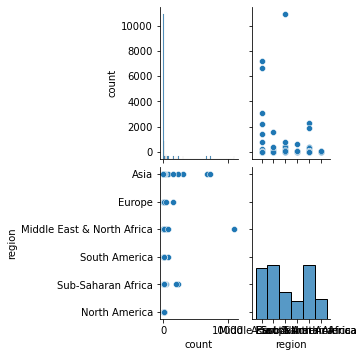

In [21]:
for var in potential_predictors:
    sns.pairplot(data,vars=['count',var])

## Question 3 [20]

Construct a simple GLM model with population and GDP per capita as predictors. Clearly indicate the linear dependence and the inverse link function. Estimate the parameters of the model. Evaluate your model by calculating the mean squared error (RMSE) and the mean absolute error (MAE) and comment on the results obtained.

linear dependence model:
$$y=\beta_0+\beta_1x_1+\beta_2x_2 $$
here: y: count, $x_1$ is population, $x_2$ is gdpPerCapita, and $\beta$'s are unknown parameters

since count is an **discrete count** variable, i choose exponential as link function. and poisson to be noise modelling distribution.

In [22]:
data.columns

Index(['cntryCode', 'country', 'count', 'gdp', 'population', 'gdpPerCapita',
       'religion', 'ethnic', 'language', 'law', 'corruption', 'democracy',
       'autocracy', 'region', 'regionCode'],
      dtype='object')

In [23]:
observed_count=np.array(data['count'])
observed_pop=np.array(data['population'])
observed_capita=np.array(data['gdpPerCapita'])
observed_law=np.array(data['law'])
observed_corruption=np.array(data['corruption'])

In [24]:
# normalized data
sh1=observed_count.std()
mean1=observed_count.mean()
observed_count_norm=(observed_count-mean1)/sh1

sh2=observed_pop.std()
mean2=observed_pop.mean()
observed_pop_norm=(observed_pop-mean2)/sh2

sh3=observed_capita.std()
mean3=observed_capita.mean()
observed_capita_norm=(observed_capita-mean3)/sh3

sh4=observed_law.std()
mean4=observed_law.mean()
observed_law_norm=(observed_law-mean4)/sh4

sh5=observed_corruption.std()
mean5=observed_corruption.mean()
observed_corruption_norm=(observed_corruption-mean5)/sh5

In [25]:
with pm.Model() as model_3:
    beta_0=pm.Normal('beta_0',mu=0,tau=1/10**2)
    beta_1=pm.Normal('beta_1',mu=0,tau=1/10**2)
    beta_2=pm.Normal('beta_2',mu=0,tau=1/10**2)
    
    input_mu=np.exp(beta_0+beta_1*observed_pop_norm+beta_2*observed_capita_norm)
    
    count=pm.Poisson('count',mu=input_mu, observed=observed_count_norm)

    samples=pm.sample(5000)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.c

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 17 seconds.
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecat

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


array([<AxesSubplot:title={'center':'beta_0'}>,
       <AxesSubplot:title={'center':'beta_1'}>,
       <AxesSubplot:title={'center':'beta_2'}>], dtype=object)

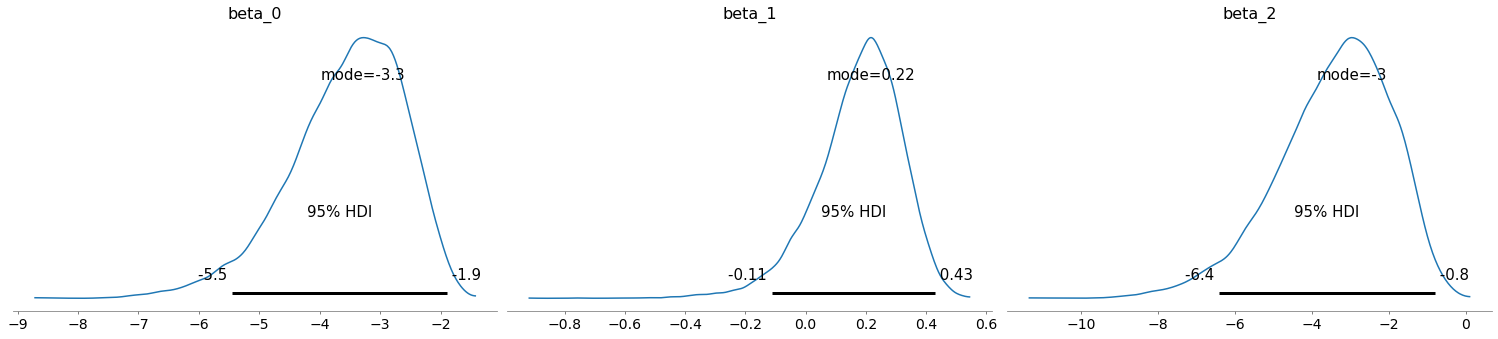

In [26]:
az.plot_posterior(samples,['beta_0','beta_1','beta_2'], hdi_prob=0.95, point_estimate='mode')

In [27]:
preds=pm.sample_posterior_predictive(samples,samples=1,model=model_3)['count'].mean(axis=0)
print(preds)
y_true=observed_count_norm.reshape(1,100)

rmse=((preds-y_true)**2).mean()
mae=(abs(preds-y_true)).mean()

print('rmse',rmse)
print('mae',mae)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
rmse 1.1142356495219128
mae 0.5193115225851115


## Question 4 [20]

Add other predictors, based on your visualization in Q2, that you think will improve the model. Estimate the model parameters and evaluate your model using RMSE and MAE and comment on the results obtained.

i add low and corruption as two more variables to help predict the count variable. i think they might help in improving the predictions. 

In [28]:
# add low and corruption index in the model to try to improve the model

with pm.Model() as model_4:
    beta_0=pm.Normal('beta_0',mu=0,sigma=10)
    beta_1=pm.Normal('beta_1',mu=0,sigma=10)
    beta_2=pm.Normal('beta_2',mu=0,sigma=10)
    beta_3=pm.Normal('beta_3',mu=0,sigma=10)
    beta_4=pm.Normal('beta_4',mu=0,sigma=10)
    
    input_mu=np.exp(beta_0+beta_1*observed_pop_norm+beta_2*observed_capita_norm+beta_2*observed_law_norm+beta_2*observed_corruption_norm)
    
    count=pm.Poisson('count',mu=input_mu, observed=observed_count_norm)

    samples=pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guida

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 16 seconds.
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecat

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


array([[<AxesSubplot:title={'center':'beta_0'}>,
        <AxesSubplot:title={'center':'beta_1'}>,
        <AxesSubplot:title={'center':'beta_2'}>],
       [<AxesSubplot:title={'center':'beta_3'}>,
        <AxesSubplot:title={'center':'beta_4'}>, <AxesSubplot:>]],
      dtype=object)

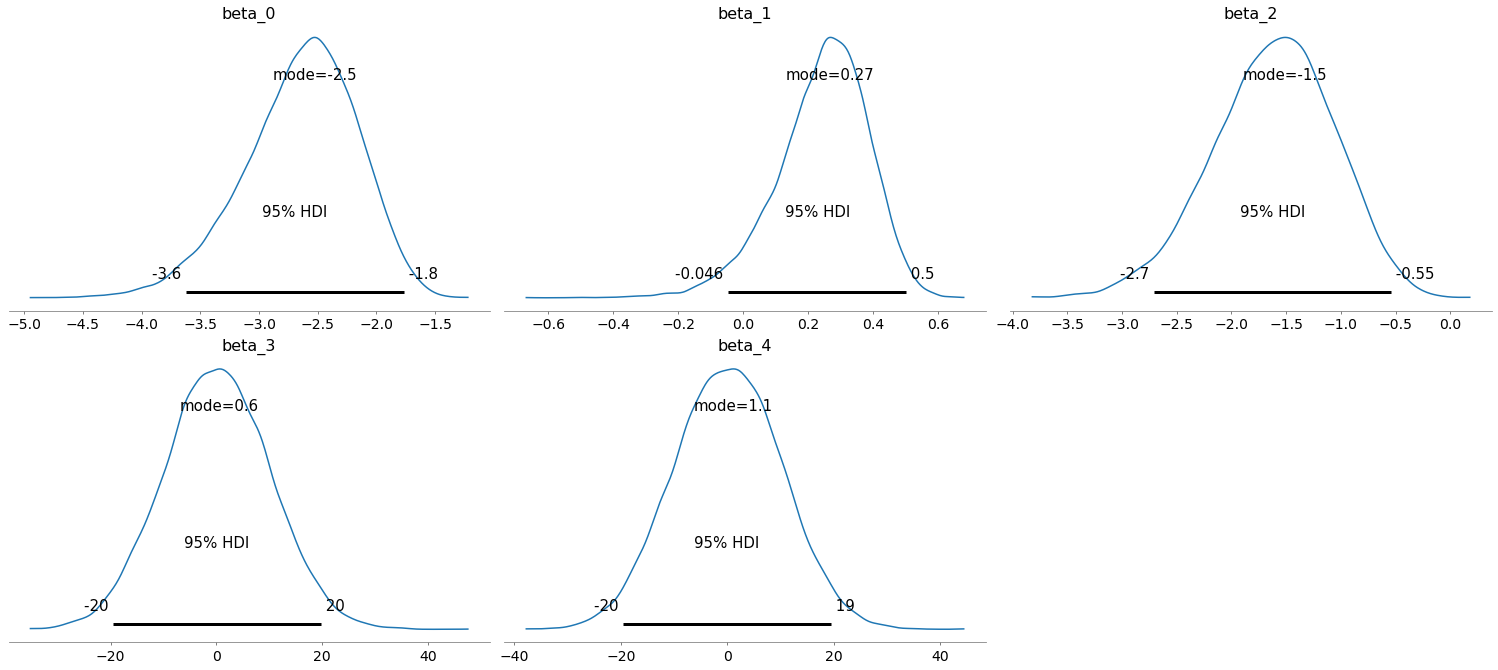

In [29]:
az.plot_posterior(samples,['beta_0','beta_1','beta_2','beta_3','beta_4'], hdi_prob=0.95, point_estimate='mode')

In [30]:
preds=pm.sample_posterior_predictive(samples,samples=1000,model=model_4)['count'].mean(axis=0)
# print(preds)

y_true=observed_count_norm.reshape(1,100)

rmse=((preds-y_true)**2).mean()
mae=(abs(preds-y_true)).mean()

print('rmse',rmse)
print('mae',mae)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


rmse 0.9983755000683074
mae 0.554978165574708


**with more informative variables added model does improve a bit, rmse and mae both have dropped**

## Question 5 [20]

Do a posterior predictive check (PPC) of the two models in Q3 and Q4. Carefully choose the statistic(s) you use for comparing the predicted data and the experimental data. Comment on the results of your PPC analysis.

In [32]:
ppc = pm.sample_posterior_predictive(samples, samples=500, model=model_3, size=100)

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


## Question 6[20]

Randomly select 20% of the data and construct a test set. Rebuild the models in Q3 and Q4 on the remaining 80% of the data. Evaluate both models on the test set. Comment on the results obtained. 

Based on the various model evaluations done which of the two models will you choose as your predictive model and why?

**reason:** I will choose model_3(from question 3) for prediction task, since it gives lower rmse on avg and hence better predictions.

In [ ]:
from sklearn.model_selection import train_test_split
training_dataset,test_dataset = train_test_split(data, train_size=80, test_size=20)

In [ ]:
# choose from train data
observed_count=np.array(training_dataset['count'])
observed_pop=np.array(training_dataset['population'])
observed_capita=np.array(training_dataset['gdpPerCapita'])
observed_law=np.array(training_dataset['law'])
observed_corruption=np.array(training_dataset['corruption'])

In [ ]:
# normalized data
sh1=observed_count.std()
mean1=observed_count.mean()
observed_count_norm=(observed_count-mean1)/sh1

sh2=observed_pop.std()
mean2=observed_pop.mean()
observed_pop_norm=(observed_pop-mean2)/sh2

sh3=observed_capita.std()
mean3=observed_capita.mean()
observed_capita_norm=(observed_capita-mean3)/sh3

sh4=observed_law.std()
mean4=observed_law.mean()
observed_law_norm=(observed_law-mean4)/sh4

sh5=observed_corruption.std()
mean5=observed_corruption.mean()
observed_corruption_norm=(observed_corruption-mean5)/sh5

In [ ]:
# add low and corruption index in the model to try to improve the model
with pm.Model() as model_3:
    beta_0=pm.Normal('beta_0',mu=0,sigma=10)
    beta_1=pm.Normal('beta_1',mu=0,sigma=10)
    beta_2=pm.Normal('beta_2',mu=0,sigma=10)
    
    input_mu=np.exp(beta_0+beta_1*observed_pop_norm+beta_2*observed_capita_norm)
    
    count=pm.Poisson('count',mu=input_mu, observed=observed_count_norm)

    samples=pm.sample(5000)

preds=pm.sample_posterior_predictive(samples,samples=1000,model=model_3)['count'].mean(axis=0)
# print(preds)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guida

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 13 seconds.
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecat

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


In [ ]:

y_true=observed_count_norm.reshape(1,80)

rmse=((preds-y_true)**2).mean()
mae=(abs(preds-y_true)).mean()

print('rmse model-3 is',rmse)
print('mae model-3 is',mae)



rmse model-3 is 0.97838088446965
mae model-3 is 0.5696547089478093


In [ ]:

with pm.Model() as model_4:
    beta_0=pm.Normal('beta_0',mu=0,sigma=10)
    beta_1=pm.Normal('beta_1',mu=0,sigma=10)
    beta_2=pm.Normal('beta_2',mu=0,sigma=10)
    beta_3=pm.Normal('beta_3',mu=0,sigma=10)
    beta_4=pm.Normal('beta_4',mu=0,sigma=10)
    
    input_mu=np.exp(beta_0+beta_1*observed_pop_norm+beta_2*observed_capita_norm+beta_2*observed_law_norm+beta_2*observed_corruption_norm)
    
    count=pm.Poisson('count',mu=input_mu, observed=observed_count_norm)

    samples=pm.sample(5000)

preds=pm.sample_posterior_predictive(samples,samples=1000,model=model_4)['count'].mean(axis=0)
# print(preds)

y_true=observed_count_norm.reshape(1,80)

rmse=((preds-y_true)**2).mean()
mae=(abs(preds-y_true)).mean()

print('rmse model-4 is',rmse)
print('mae model-4 is',mae)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guida

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 12 seconds.
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecat

/home/sunild/anaconda3/envs/cgs/lib/python3.9/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


rmse model-4 is 0.9974441314781393
mae model-4 is 0.5777422124677969
